In [17]:
from picaso import justdoit as jdi 
from picaso import justplotit as jpi

jpi.output_notebook()

Loading BokehJS ...

In [48]:
opa = jdi.opannection(wave_range=[0.3,2.2])
cldjup = jdi.inputs()
#phase 
cldjup.phase_angle(0) #radians

#gravity 

radius = 1
massj = 1 
cldjup.gravity(radius=radius, radius_unit=u.Rjup, 
            mass = massj, mass_unit=u.Mjup)

#star
cldjup.star(opa, 6000,0.0122,4.437,semi_major = 1.5, semi_major_unit = u.au) #kelvin, log metal, log cgs

#atmosphere
cldjup.atmosphere(filename= jdi.jupiter_pt(), delim_whitespace=True)

#clouds
cldjup.clouds( filename= jdi.jupiter_cld(), delim_whitespace=True)

#spectrum
cj_spec = cldjup.spectrum(opa)
cj_wno, cj_alb, cj_fpfs = cj_spec['wavenumber'] , cj_spec['albedo'] , cj_spec['fpfs_reflected'] 
cj_wno150, cj_fpfs150 = jdi.mean_regrid(cj_wno, cj_fpfs, R=150)
cj_wno50, cj_fpfs50 = jdi.mean_regrid(cj_wno, cj_fpfs, R=50)
cj_wno300, cj_fpfs300 = jdi.mean_regrid(cj_wno, cj_fpfs, R=300)

In [39]:
planet_mh_str = '+050'#'+2' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '050'#'0.5' # CtoO ratio
ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db)

filename = 'ColdJup-Teq200-sep0.73-mh+050-co050-fsed1-Tstar6000.0-mmw2.2.pkl'
savefilename = '/Volumes/Oy/Reflected-Light-Ames/models/'+filename

# ds = jdi.xr.load_dataset(savefilename)
# cn = jdi.input_xarray(ds, opacity_ck, calculation='planet')
# cn_spec = cn.spectrum(opacity_ck, calculation='reflected+thermal', full_output=True)
import pickle
cj = pickle.load(open(savefilename.replace('.nc','.pkl'),'rb'))
# pl, noclouds, w_noclouds, f_noclouds, clouds, clouds_added, mols, clouds_spectrum, w_clouds, f_clouds
cj_spectrum = cj[7]
cj_wno, cj_alb, cj_fpfs = cj_spectrum['wavenumber'] , cj_spectrum['albedo'] , cj_spectrum['fpfs_reflected'] 
cj_wno150, cj_fpfs150 = jdi.mean_regrid(cj_wno, cj_fpfs, R=150)
cj_wno50, cj_fpfs50 = jdi.mean_regrid(cj_wno, cj_fpfs, R=50)
cj_wno300, cj_fpfs300 = jdi.mean_regrid(cj_wno, cj_fpfs, R=300)



In [40]:
planet_mh_str = '+200'#'+2' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '050'#'0.5' # CtoO ratio
ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db)

filename = 'ColdNep-Teq200-sep0.73-mh+200-co050-fsed1-Tstar6000.0-mmw2.2.pkl'
savefilename = '/Volumes/Oy/Reflected-Light-Ames/models/'+filename

# ds = jdi.xr.load_dataset(savefilename)
# cn = jdi.input_xarray(ds, opacity_ck, calculation='planet')
# cn_spec = cn.spectrum(opacity_ck, calculation='reflected+thermal', full_output=True)
import pickle
cn = pickle.load(open(savefilename.replace('.nc','.pkl'),'rb'))
# pl, noclouds, w_noclouds, f_noclouds, clouds, clouds_added, mols, clouds_spectrum, w_clouds, f_clouds
cn_spectrum = cn[7]
cn_wno, cn_alb, cn_fpfs = cn_spectrum['wavenumber'] , cn_spectrum['albedo'] , cn_spectrum['fpfs_reflected'] 
cn_wno150, cn_fpfs150 = jdi.mean_regrid(cn_wno, cn_fpfs, R=150)
cn_wno50, cn_fpfs50 = jdi.mean_regrid(cn_wno, cn_fpfs, R=50)
cn_wno300, cn_fpfs300 = jdi.mean_regrid(cn_wno, cn_fpfs, R=300)



In [41]:
from myastrotools.tools import SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, NIRC2HFilter, NIRC2JFilter

filters = [SloangFilter(),SloaniFilter(),SloanrFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
filters[3].wavelength

array([ 200. ,  200.5,  201. , ..., 1100.5, 1101. , 1101.5])

<IPython.core.display.Javascript object>


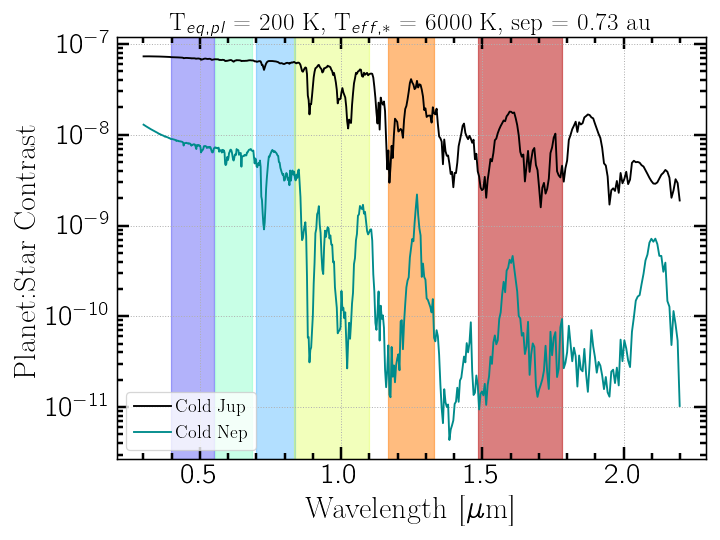

0.15221964302108756
0.1381180962496734
0.13293928017323595
0.26724562348637526


In [49]:
%matplotlib notebook
plt.plot(1e4/cj_wno300, cj_fpfs300, color='black', label='Cold Jup')
plt.plot(1e4/cn_wno300, cn_fpfs300, color='darkcyan', label='Cold Nep')

import matplotlib
cmap = matplotlib.cm.get_cmap('Paired')
cmap = matplotlib.cm.get_cmap('jet')

n = len(filters)
cs = np.linspace(0.1,0.95,n)
colors = cmap(cs)

filter_labels=["g'","r'","i'","z'",'J','H']
for i,f in enumerate(filters[:4]):
    plt.axvspan(f.half_max_low*u.nm.to(u.um), f.half_max_high*u.nm.to(u.um), alpha = 0.3,
               color=colors[i])
    print(f.fwhm*u.nm.to(u.um))
    plt.annotate(filter_labels[i], xy = (f.central_wavelength*u.nm.to(u.um),2e-7), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)
for i,f in enumerate(filters[4:]):
    plt.axvspan(f.half_max_low, f.half_max_high, alpha = 0.5,
               color=colors[i+4])
    plt.annotate(filter_labels[i+4], xy = (f.central_wavelength,2e-7), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)

plt.title(r'T$_{eq,pl}$ = 200 K, T$_{eff,*}$ = 6000 K, sep =  0.73 au')
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =10, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =5, width=2,direction='in',labelsize=23)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=25)
plt.ylabel('Planet:Star Contrast', fontsize=25)
plt.gca().set_yscale('log')
plt.grid(ls=':')
plt.legend(fontsize=15, loc='lower left')
plt.tight_layout()

<IPython.core.display.Javascript object>


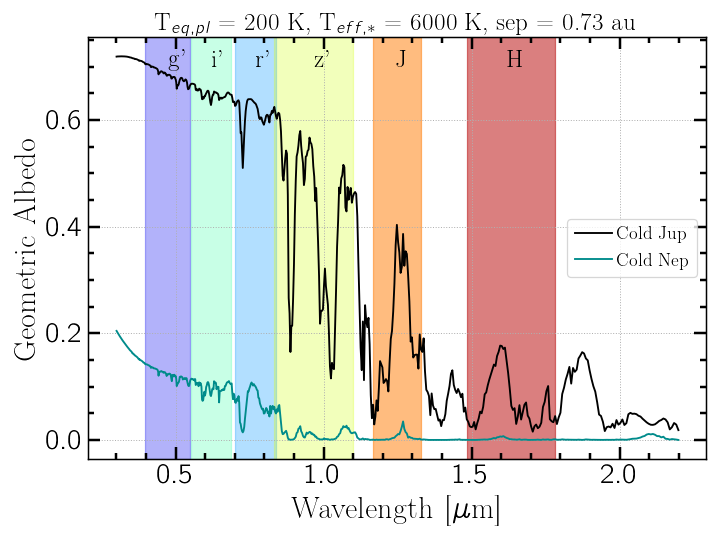

0.15221964302108756
0.1381180962496734
0.13293928017323595
0.26724562348637526


In [50]:

cn_wno150,cn_alb150 = jdi.mean_regrid(cn_wno, cn_alb, R=150)
cn_wno50, cn_alb50 = jdi.mean_regrid(cn_wno, cn_alb, R=50)
cn_wno300, cn_alb300 = jdi.mean_regrid(cn_wno, cn_alb, R=300)

cj_wno150,cj_alb150 = jdi.mean_regrid(cj_wno, cj_alb, R=150)
cj_wno50, cj_alb50 = jdi.mean_regrid(cj_wno, cj_alb, R=50)
cj_wno300, cj_alb300 = jdi.mean_regrid(cj_wno, cj_alb, R=300)


%matplotlib notebook
plt.plot(1e4/cj_wno300, cj_alb300, color='black', label='Cold Jup')
plt.plot(1e4/cn_wno300, cn_alb300, color='darkcyan', label='Cold Nep')


import matplotlib
cmap = matplotlib.cm.get_cmap('Paired')
cmap = matplotlib.cm.get_cmap('jet')

n = len(filters)
cs = np.linspace(0.1,0.95,n)
colors = cmap(cs)

filter_labels=["g'","r'","i'","z'",'J','H']
for i,f in enumerate(filters[:4]):
    plt.axvspan(f.half_max_low*u.nm.to(u.um), f.half_max_high*u.nm.to(u.um), alpha = 0.3,
               color=colors[i])
    print(f.fwhm*u.nm.to(u.um))
    plt.annotate(filter_labels[i], xy = (f.central_wavelength*u.nm.to(u.um),0.7), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)
for i,f in enumerate(filters[4:]):
    plt.axvspan(f.half_max_low, f.half_max_high, alpha = 0.5,
               color=colors[i+4])
    plt.annotate(filter_labels[i+4], xy = (f.central_wavelength,0.7), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)

plt.title(r'T$_{eq,pl}$ = 200 K, T$_{eff,*}$ = 6000 K, sep =  0.73 au')
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =10, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =5, width=2,direction='in',labelsize=23)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=25)
plt.ylabel('Geometric Albedo', fontsize=25)
#plt.gca().set_yscale('log')
plt.grid(ls=':')
plt.legend(fontsize=15, loc='center right')
plt.tight_layout()